In [2]:
#Figure 3 - median by month of Schl reconstructed - October 2023
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import glob

In [3]:
#Load median of merged products and VIIRS
path_out = '/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/Preproc_GRL/'
GCMEMS = xr.open_dataset(path_out + 'GCMEMS_median.nc')
GCMEMS = GCMEMS.sel(time = slice('1997-01','2021-12'))

VIR = xr.open_mfdataset(path_out + 'VIR_median.nc')
VIR = VIR.sel(time = slice('1997-01','2021-12'))

GSM = xr.open_dataset(path_out + 'GSM_median.nc')
GSM = GSM.sel(time = slice('1997-01','2021-12'))

CCI = xr.open_dataset(path_out + 'CCI_median.nc')
CCI = CCI.sel(time = slice('1997-01','2021-12'))


In [4]:
#Load VIIRS model median
log = "/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/*/VIRstrat*/pred_median.nc"
list_model = glob.glob(log)
i = 0
VIR_pred = xr.open_dataset(list_model[i])
VIR_pred = VIR_pred.rename_vars({'chloro_qua': f'chloro_qua_{i}'})
for i in np.arange(1,len(list_model)):
    ds = xr.open_dataset(list_model[i])
    ds = ds.rename_vars({'chloro_qua': f'chloro_qua_{i}'})
    VIR_pred = xr.merge([VIR_pred,ds])

In [5]:
#Load GSM model median
log = "/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/*/GSMstrat*/pred_median.nc"
list_model = glob.glob(log)
i = 0
GSM_pred = xr.open_dataset(list_model[i])
GSM_pred = GSM_pred.rename_vars({'chloro_qua': f'chloro_qua_{i}'})
for i in np.arange(1,len(list_model)):
    ds = xr.open_dataset(list_model[i])
    ds = ds.rename_vars({'chloro_qua': f'chloro_qua_{i}'})
    GSM_pred = xr.merge([GSM_pred,ds])
len(list_model)

10

In [6]:
#Load CCI model median
log = "/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/*/CCIstrat*/pred_median.nc"
list_model = glob.glob(log)
i = 0
CCI_pred = xr.open_dataset(list_model[i])
CCI_pred = CCI_pred.rename_vars({'chloro_qua': f'chloro_qua_{i}'})
for i in np.arange(1,len(list_model)):
    ds = xr.open_dataset(list_model[i])
    ds = ds.rename_vars({'chloro_qua': f'chloro_qua_{i}'})
    CCI_pred = xr.merge([CCI_pred,ds])

In [7]:
#GCMEMS
#Load CCI model median
log = "/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/*/GCMEMSstrat*/pred_median.nc"
list_model = glob.glob(log)
i = 0
GCMEMS_pred = xr.open_dataset(list_model[i])
GCMEMS_pred = GCMEMS_pred.rename_vars({'chloro_qua': f'chloro_qua_{i}'})
for i in np.arange(1,len(list_model)):
    ds = xr.open_dataset(list_model[i])
    ds = ds.rename_vars({'chloro_qua': f'chloro_qua_{i}'})
    GCMEMS_pred = xr.merge([GCMEMS_pred,ds])
len(list_model)

10

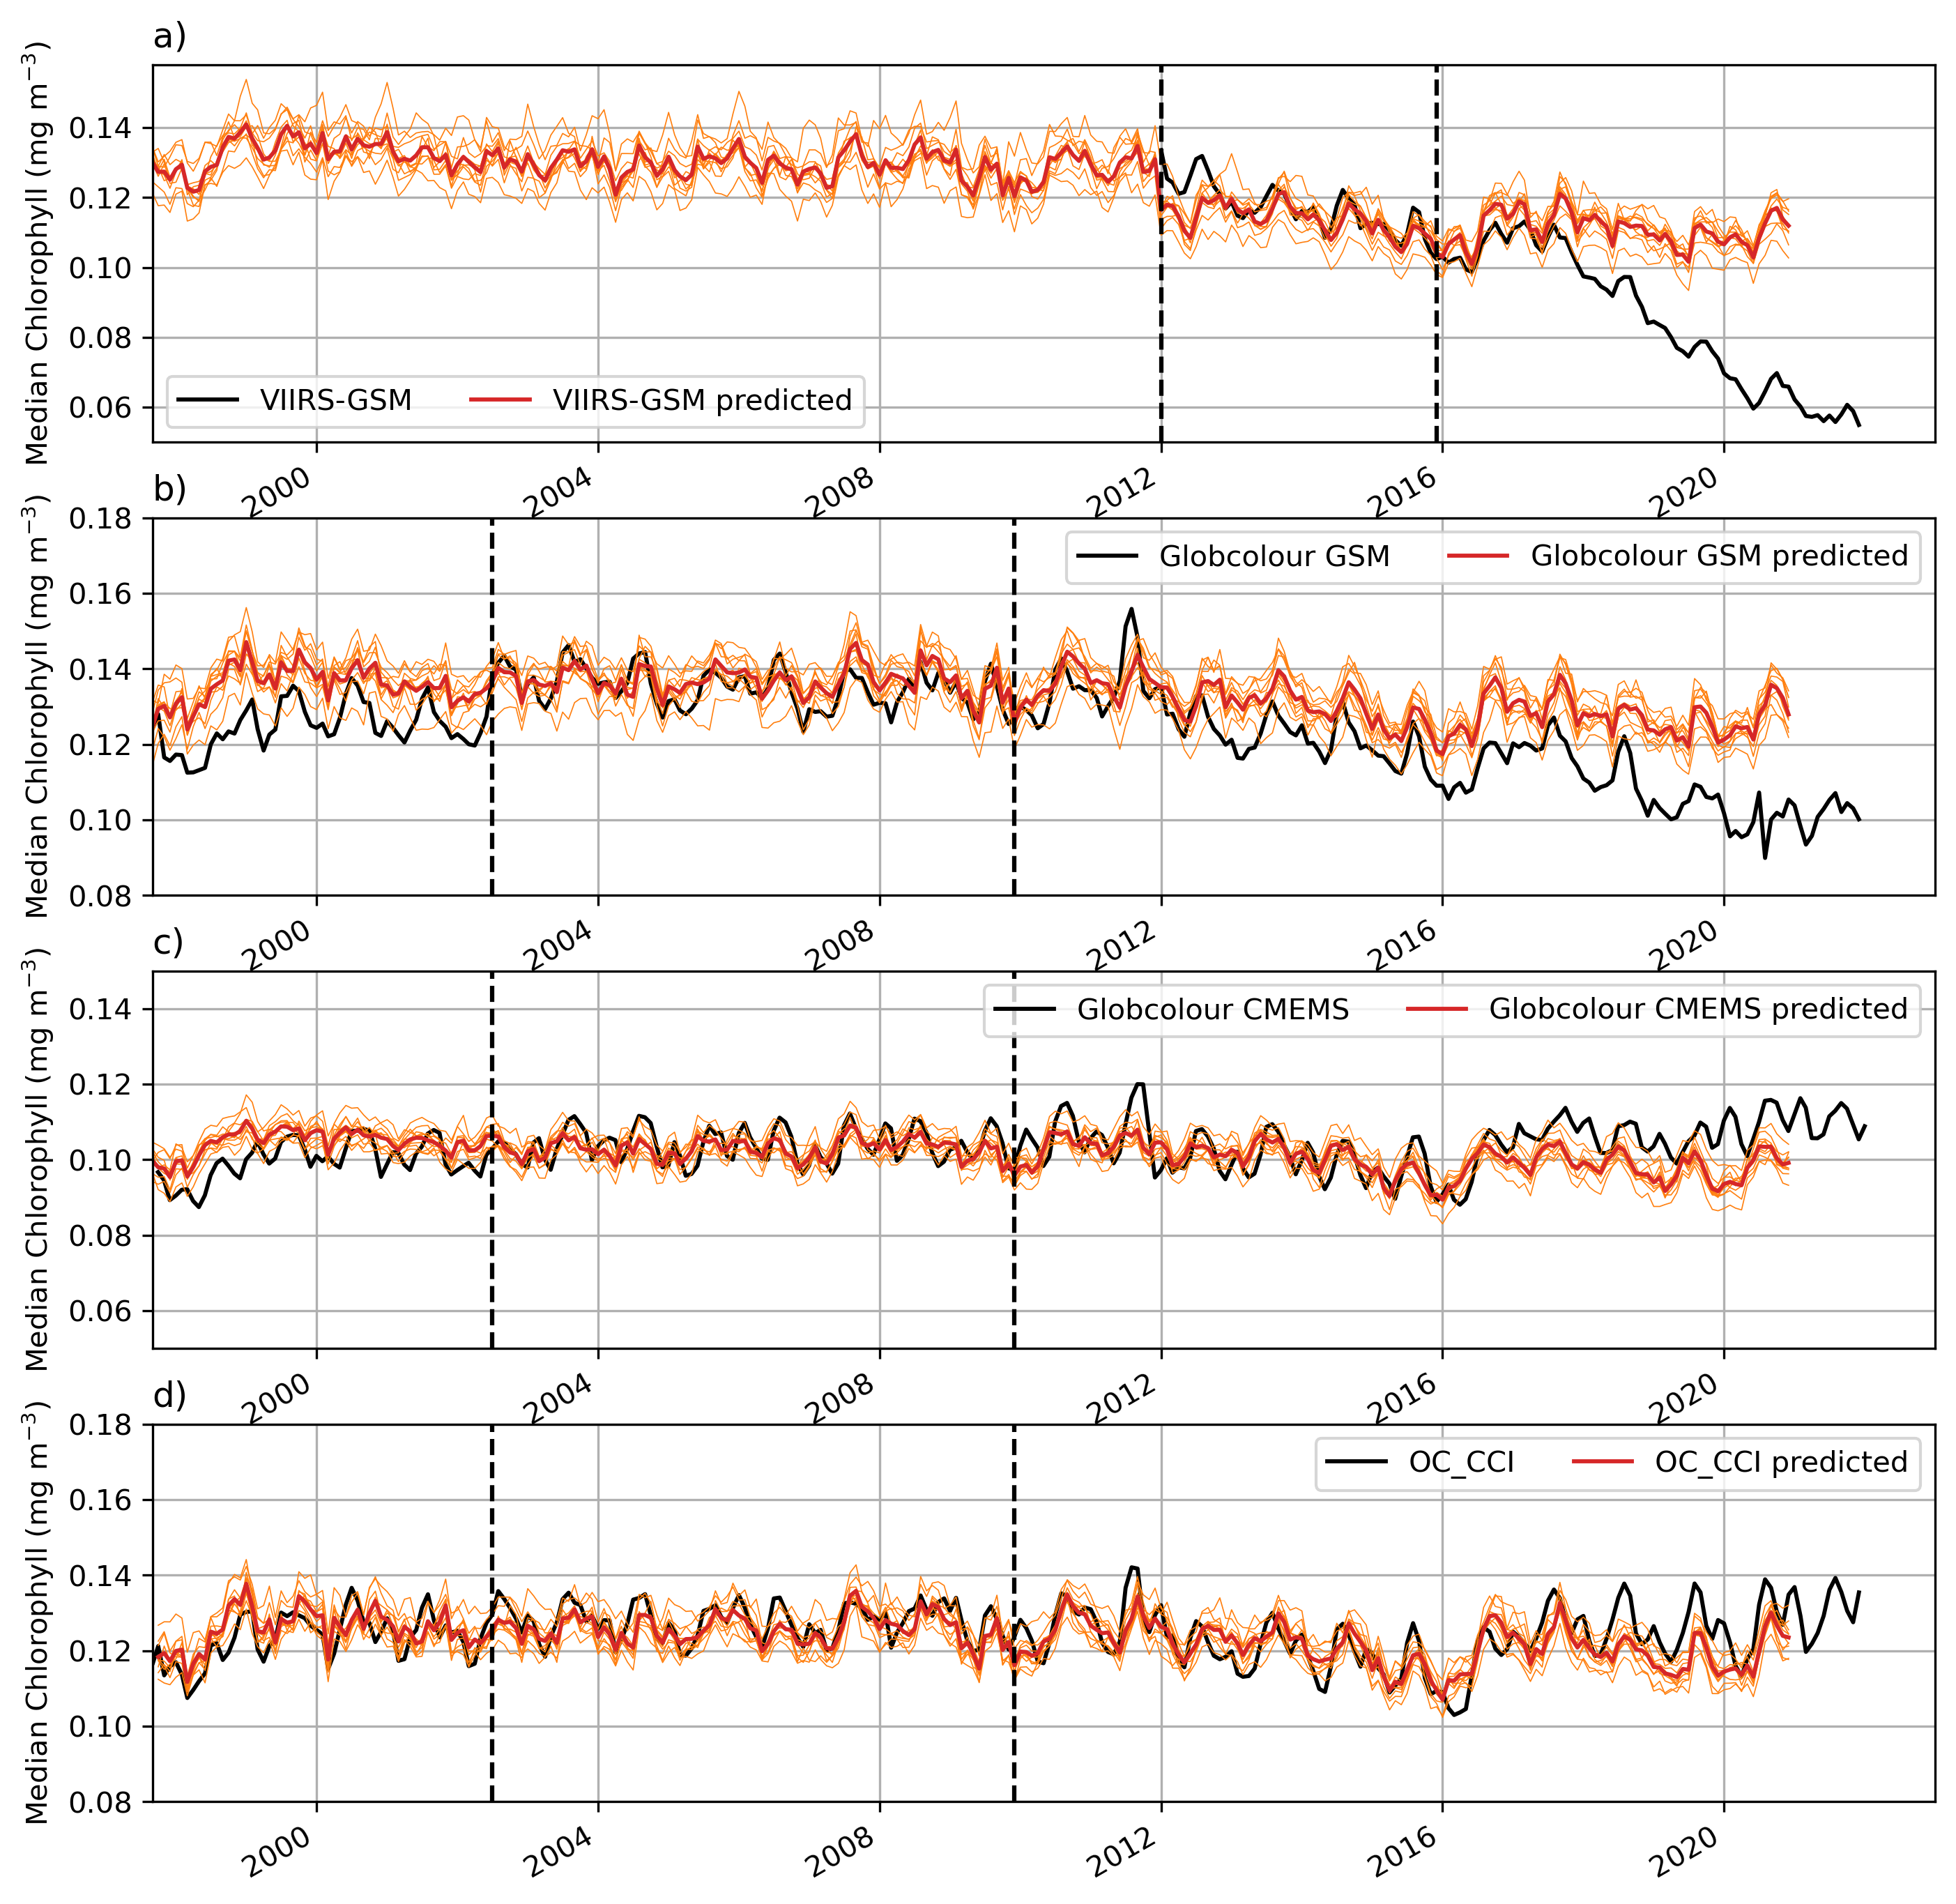

In [7]:
#Plot MEDIAN
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4,1, figsize=(11,11), dpi=300)
l1 = 0.4
l2 = 1.4

#VIIRS
ax = ax1
VIR.chloro_qua.plot(c = 'black',label = "VIIRS-GSM",linewidth = l2,ax = ax)
#
for i in np.arange(10):
    VIR_pred[f'chloro_qua_{i}'].plot(color = 'tab:orange',ax = ax,linewidth = l1)
VIR_pred.to_array(dim='model').mean('model').plot(color = "tab:red",linewidth = l2,ax = ax,label = "VIIRS-GSM predicted")
d1 = '2012-01'
d2 = '2015-12'
ax.axvline(x = pd.to_datetime(d1),linestyle = '--',color = 'black')
ax.axvline(x = pd.to_datetime(d2),linestyle = '--',color = 'black')
ax.set_title("a)", loc='left')
ax.legend(ncol = 2)

#GSM
ax = ax2
GSM.chloro_qua.plot(c = 'black',linewidth = l2,ax = ax,label = "Globcolour GSM")
#
for i in np.arange(10):
    GSM_pred[f'chloro_qua_{i}'].plot(color = 'tab:orange',ax = ax,linewidth = l1)
GSM_pred.to_array(dim='model').mean('model').plot(color = "tab:red",linewidth = l2,ax = ax,label = "Globcolour GSM predicted")
d1 = '2002-07'
d2 = '2009-12'
ax.axvline(x = pd.to_datetime(d1),linestyle = '--',color = 'black')
ax.axvline(x = pd.to_datetime(d2),linestyle = '--',color = 'black')    
ax.set_title("b)", loc='left')

#GCMEMS
ax = ax3
GCMEMS.chloro_qua.plot(c = 'black',linewidth = l2,ax = ax,label = "Globcolour CMEMS")
#
for i in np.arange(10):
    GCMEMS_pred[f'chloro_qua_{i}'].plot(color = 'tab:orange',ax = ax,linewidth = l1)
GCMEMS_pred.to_array(dim='model').mean('model').plot(color = "tab:red",linewidth = l2,ax = ax,label = "Globcolour CMEMS predicted")
d1 = '2002-07'
d2 = '2009-12'
ax.axvline(x = pd.to_datetime(d1),linestyle = '--',color = 'black')
ax.axvline(x = pd.to_datetime(d2),linestyle = '--',color = 'black')    
ax.set_title("c)", loc='left')

#CCI
ax = ax4
CCI.chloro_qua.plot(c = 'black',linewidth = l2,ax = ax,label = "OC_CCI")
#
for i in np.arange(10):
    CCI_pred[f'chloro_qua_{i}'].plot(color = 'tab:orange',ax = ax,linewidth = l1)
CCI_pred.to_array(dim='model').mean('model').plot(color = "tab:red",linewidth = l2,ax = ax,label = "OC_CCI predicted")
d1 = '2002-07'
d2 = '2009-12'
ax.axvline(x = pd.to_datetime(d1),linestyle = '--',color = 'black')
ax.axvline(x = pd.to_datetime(d2),linestyle = '--',color = 'black')    
ax.set_title("d)", loc='left')

ax1.set_ylim([0.05,0.158])
ax2.set_ylim([0.08,0.18])
ax3.set_ylim([0.05,0.15])
ax4.set_ylim([0.08,0.18])

for ax in [ax1,ax2,ax3,ax4]:
    ax.legend(ncol = 2)
    ax.grid()
    ax.set_xlabel("")
    ax.set_ylabel('Median Chlorophyll (mg m$^{-3}$)')
    ax.set_xlim([pd.to_datetime('1997-09'),pd.to_datetime('2023-01')])

    #Check dates
#    ax.axvline(x = pd.to_datetime('1998-03-01'),linestyle = '--',color = 'black')    
#    ax.set_ylim([0.05,0.17])

plt.savefig('Figure_GRL/Fig3_2021.png', bbox_inches='tight')

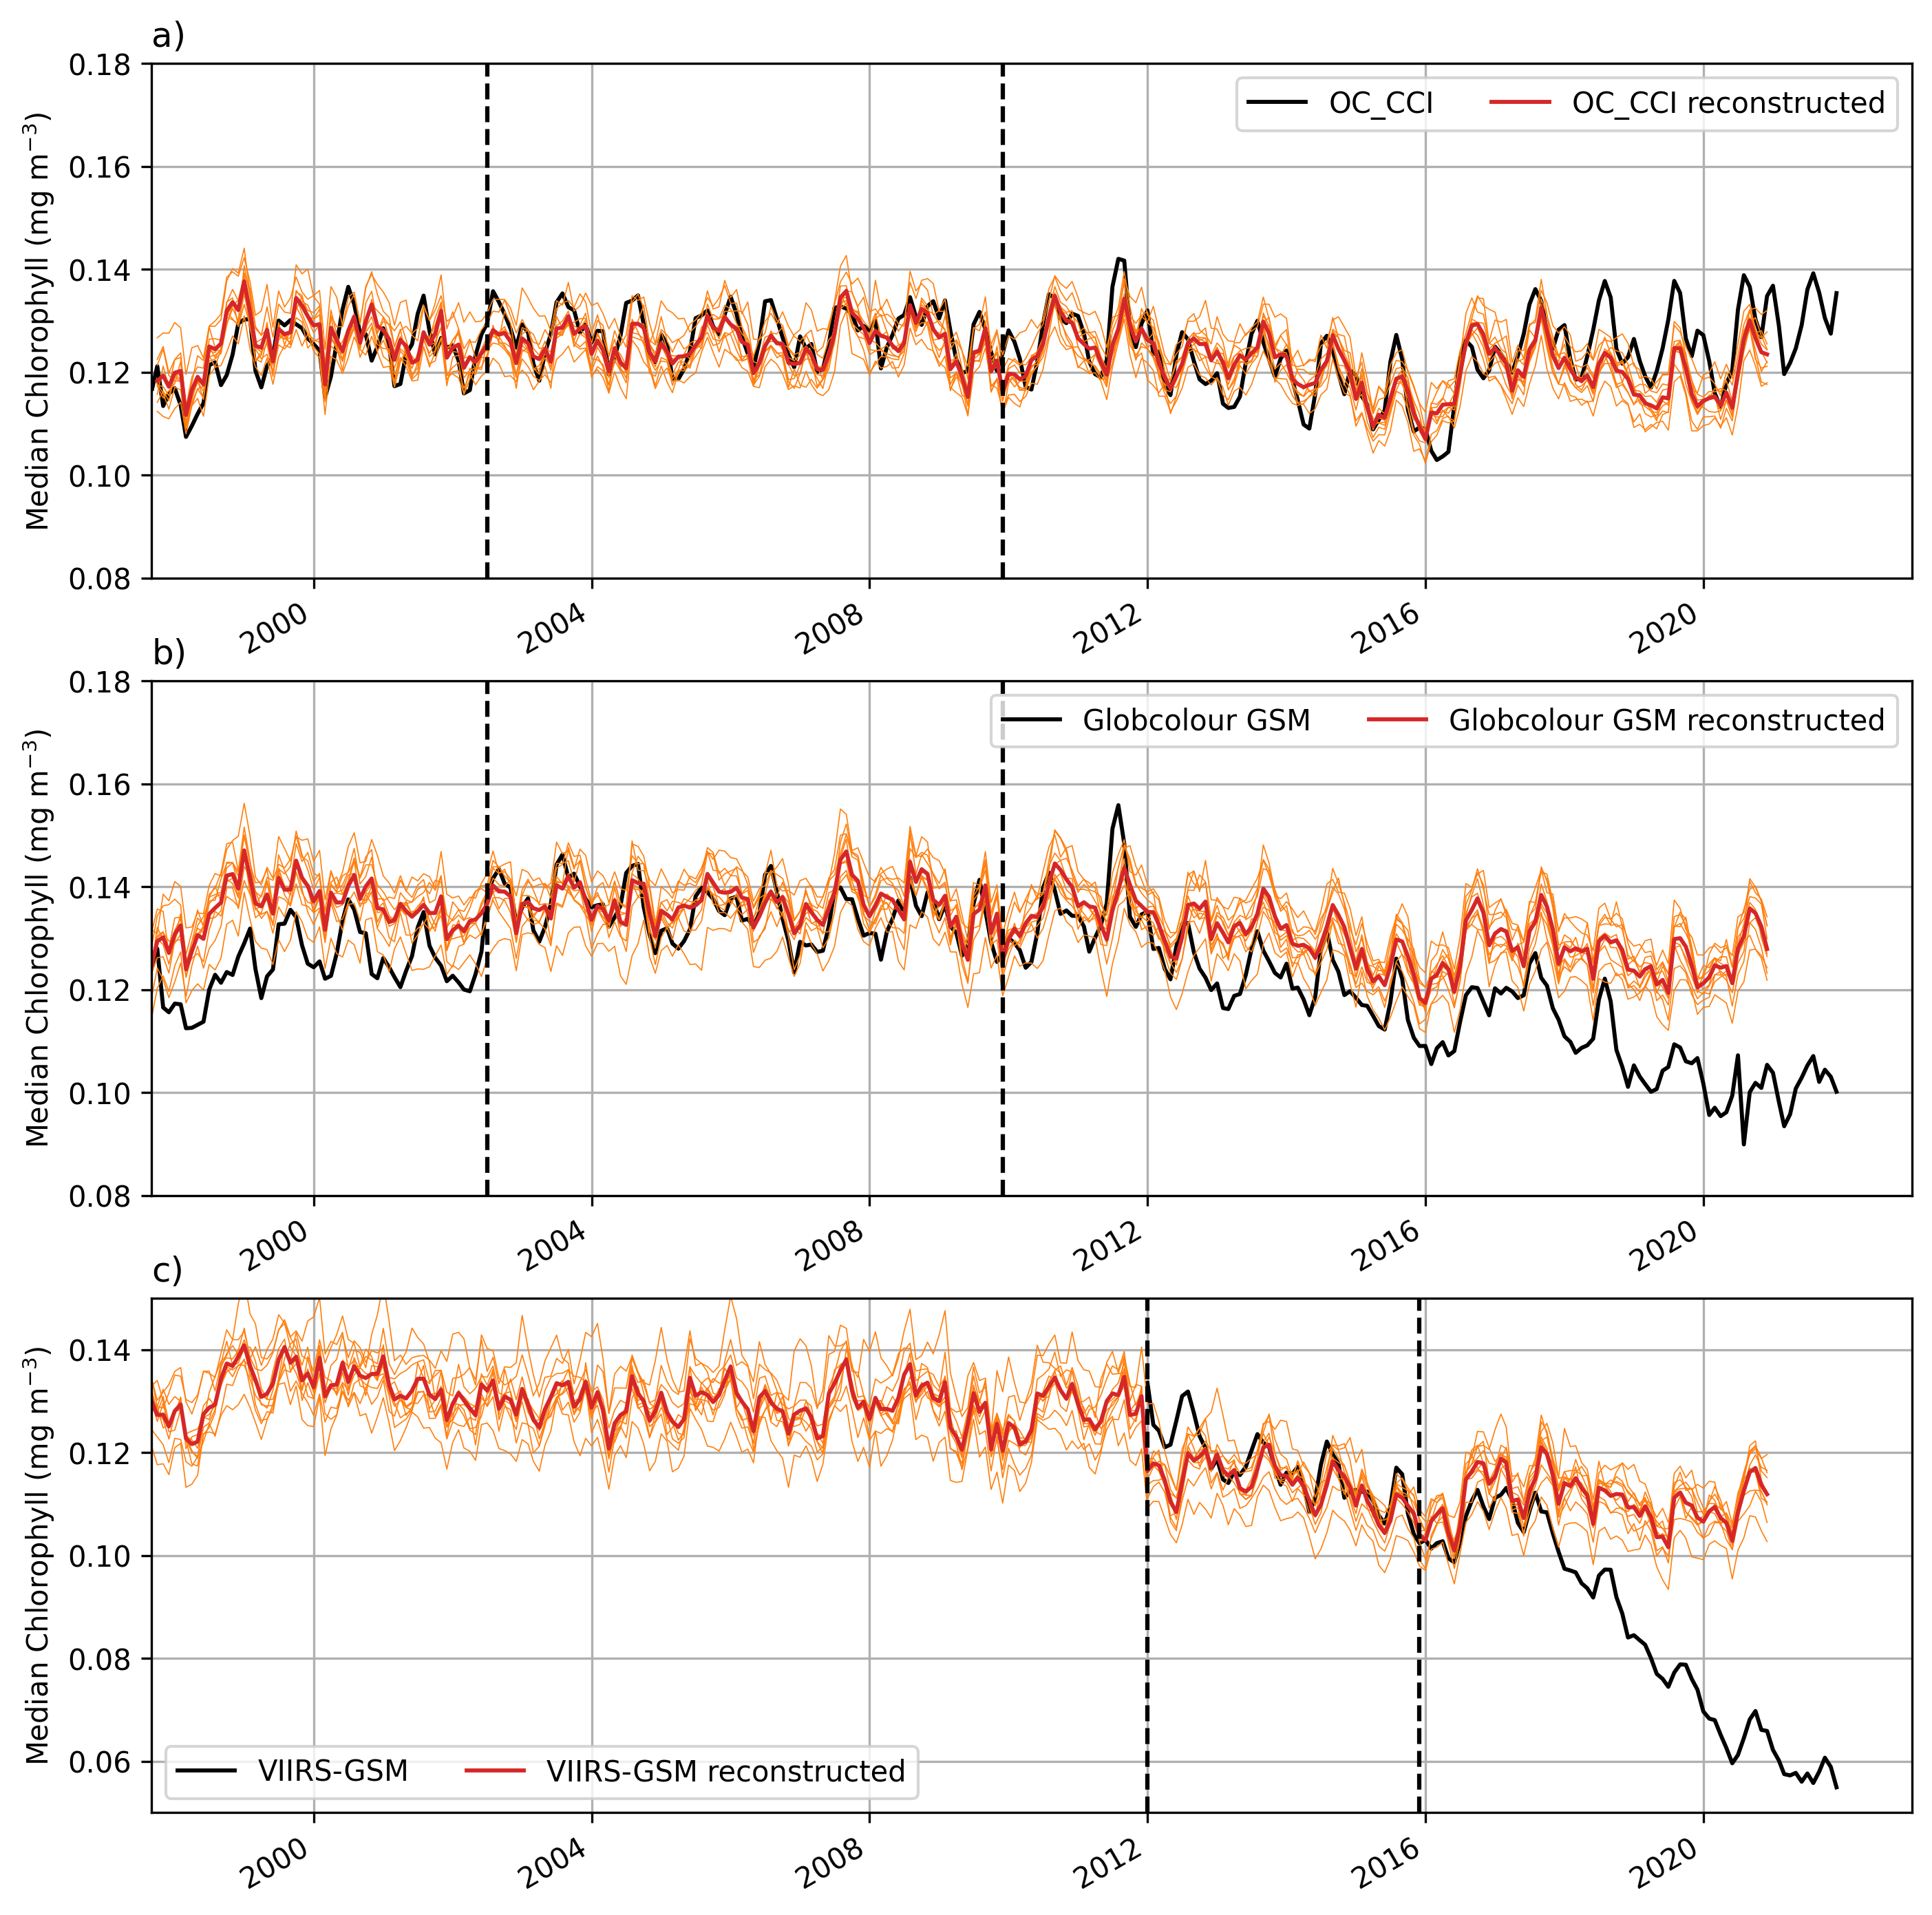

In [9]:
#Plot MEDIAN
fig, ((ax1, ax2, ax3)) = plt.subplots(3,1, figsize=(11,11), dpi=300)
l1 = 0.4
l2 = 1.4

#CCI
ax = ax1
CCI.chloro_qua.plot(c = 'black',linewidth = l2,ax = ax,label = "OC_CCI")
#
for i in np.arange(10):
    CCI_pred[f'chloro_qua_{i}'].plot(color = 'tab:orange',ax = ax,linewidth = l1)
CCI_pred.to_array(dim='model').mean('model').plot(color = "tab:red",linewidth = l2,ax = ax,label = "OC_CCI reconstructed")
d1 = '2002-07'
d2 = '2009-12'
ax.axvline(x = pd.to_datetime(d1),linestyle = '--',color = 'black')
ax.axvline(x = pd.to_datetime(d2),linestyle = '--',color = 'black')    
ax.set_title("a)", loc='left')

#GSM
ax = ax2
GSM.chloro_qua.plot(c = 'black',linewidth = l2,ax = ax,label = "Globcolour GSM")
#
for i in np.arange(10):
    GSM_pred[f'chloro_qua_{i}'].plot(color = 'tab:orange',ax = ax,linewidth = l1)
GSM_pred.to_array(dim='model').mean('model').plot(color = "tab:red",linewidth = l2,ax = ax,label = "Globcolour GSM reconstructed")
d1 = '2002-07'
d2 = '2009-12'
ax.axvline(x = pd.to_datetime(d1),linestyle = '--',color = 'black')
ax.axvline(x = pd.to_datetime(d2),linestyle = '--',color = 'black')    
ax.set_title("b)", loc='left')

#VIIRS
ax = ax3
VIR.chloro_qua.plot(c = 'black',label = "VIIRS-GSM",linewidth = l2,ax = ax)
#
for i in np.arange(10):
    VIR_pred[f'chloro_qua_{i}'].plot(color = 'tab:orange',ax = ax,linewidth = l1)
VIR_pred.to_array(dim='model').mean('model').plot(color = "tab:red",linewidth = l2,ax = ax,label = "VIIRS-GSM reconstructed")
d1 = '2012-01'
d2 = '2015-12'
ax.axvline(x = pd.to_datetime(d1),linestyle = '--',color = 'black')
ax.axvline(x = pd.to_datetime(d2),linestyle = '--',color = 'black')
ax.set_title("c)", loc='left')
ax.legend(ncol = 2)

ax1.set_ylim([0.08,0.18])
ax2.set_ylim([0.08,0.18])
ax3.set_ylim([0.05,0.15])

for ax in [ax1,ax2,ax3]:
    ax.legend(ncol = 2)
    ax.grid()
    ax.set_xlabel("")
    ax.set_ylabel('Median Chlorophyll (mg m$^{-3}$)')
    ax.set_xlim([pd.to_datetime('1997-09'),pd.to_datetime('2023-01')])

    #Check dates
#    ax.axvline(x = pd.to_datetime('1998-03-01'),linestyle = '--',color = 'black')    
#    ax.set_ylim([0.05,0.17])

plt.savefig('Figure_GRL/Fig3_bis.png', bbox_inches='tight')